In [1]:
import pandas as pd

time_use_data = pd.read_csv('gss_tu2016_main_file.csv')

time_use_data.head()

,CASEID,pumfid,wght_per,survmnth,wtbs_001,agecxryg,agegr10,agehsdyc,ageprgrd,chh0014c,...,ree_02,ree_03,rlr_110,lan_01,lanhome,lanhmult,lanmt,lanmtmul,incg1,hhincg1
0,10000,10000,616.6740,7,305.1159,96,5,62,96,0,...,1,1,1,1,1,1,1,1,1,1
1,10001,10001,8516.6140,7,0.0000,6,5,32,5,0,...,5,6,3,1,5,2,5,2,5,8
2,10002,10002,371.7520,1,362.7057,2,4,9,10,3,...,5,1,1,1,1,1,1,1,3,8
3,10003,10003,1019.3135,3,0.0000,96,6,65,96,0,...,3,2,2,1,1,1,1,1,2,2
4,10004,10004,1916.0708,9,11388.9706,96,2,25,96,0,...,9,99,9,9,99,9,99,9,2,4


In [2]:
important_columns = [
    "CASEID", "prv",
    "luc_rst", "agegr10", "marstat", "sex", "chh0014c",
    "gtu_110", "dur01", "dur08"
]

subset_time_use_data = time_use_data[important_columns]

subset_time_use_data.head()

,CASEID,prv,luc_rst,agegr10,marstat,sex,chh0014c,gtu_110,dur01,dur08
0,10000,46,1,5,5,1,0,1,510,0
1,10001,59,1,5,1,1,0,3,420,0
2,10002,47,1,4,1,2,3,1,570,480
3,10003,35,1,6,5,2,0,2,510,20
4,10004,35,1,2,6,1,0,1,525,0


In [3]:
# dictionary of 'old name':'new name'

newnames = {
        'CASEID': 'Participant ID',
        'luc_rst': 'Urban/Rural',
        'agegr10': 'Age Group',
        'marstat': 'Marital Status',
        'sex': 'sex',
        'chh0014c': 'Kids under 14',
        'gtu_110': 'Feeling Rushed',
        'dur01': 'Sleep duration',
        'dur08': 'Work duration'
    }

subset_time_use_data_colnames = subset_time_use_data.rename(columns = newnames)

subset_time_use_data_colnames.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration
0,10000,46,1,5,5,1,0,1,510,0
1,10001,59,1,5,1,1,0,3,420,0
2,10002,47,1,4,1,2,3,1,570,480
3,10003,35,1,6,5,2,0,2,510,20
4,10004,35,1,2,6,1,0,1,525,0


In [4]:
subset_time_use_data_colnames['Sleep duration (hours)'] = subset_time_use_data_colnames['Sleep duration'] / 60

subset_time_use_data_colnames.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours)
0,10000,46,1,5,5,1,0,1,510,0,8.50
1,10001,59,1,5,1,1,0,3,420,0,7.00
2,10002,47,1,4,1,2,3,1,570,480,9.50
3,10003,35,1,6,5,2,0,2,510,20,8.50
4,10004,35,1,2,6,1,0,1,525,0,8.75


In [6]:
subset_time_use_data_colnames['Age Group'].value_counts() #Transforming a column using if-then

Age Group
5    3741
6    2958
4    2789
3    2597
2    2127
7    1875
1    1303
Name: count, dtype: int64

In [7]:
# make a copy of the dataframe
subset_time_df = subset_time_use_data_colnames.copy()

# create a new column called 'Age group label'

subset_time_df.loc[subset_time_df['Age Group'] == 1, 'Age group label'] = '15-24'

subset_time_df.loc[subset_time_df['Age Group'] == 2, 'Age group label'] = '25-34'

subset_time_df.loc[subset_time_df['Age Group'] == 3, 'Age group label'] = '35-44'

subset_time_df.loc[subset_time_df['Age Group'] == 4, 'Age group label'] = '45-54'

subset_time_df.loc[subset_time_df['Age Group'] == 5, 'Age group label'] = '55-64'

subset_time_df.loc[subset_time_df['Age Group'] == 6, 'Age group label'] = '65-74'

subset_time_df.loc[subset_time_df['Age Group'] == 7, 'Age group label'] = '75+'

subset_time_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label
0,10000,46,1,5,5,1,0,1,510,0,8.50,55-64
1,10001,59,1,5,1,1,0,3,420,0,7.00,55-64
2,10002,47,1,4,1,2,3,1,570,480,9.50,45-54
3,10003,35,1,6,5,2,0,2,510,20,8.50,65-74
4,10004,35,1,2,6,1,0,1,525,0,8.75,25-34


## To create a new column in a pandas DataFrame using if-then/if-then-else logic 

This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 1, 'Age group label'] = '15-24'` 

creates a new column in `subset_time_df` called `Age group label` according to the *if-then (conditional)* logic:

**If** `subset_time_df['Age Group'] == 1` **then**  `Age group label` is assigned the value `15-24`.
  
This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 2, 'Age group label'] = '25-34'`

does the *else if* logic.  Namely,

**If** `subset_time_df['Age Group'] == 2` **then**  `Age group label` is assigned the value `25-34`.
    
This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 3, 'Age group label'] = '35-44'`

does the *else if* logic. Namely,

**If** `subset_time_df['Age Group'] == 3` **then**  `Age group label` is assigned the value `35-44`. 

etc ...

See [idioms in the Pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#idioms) and [a reference on different ways to subset a pandas DataFrame](https://pandas.pydata.org/pandas-docs/version/1.0/getting_started/intro_tutorials/03_subset_data.html).

In [8]:
prov_data = pd.read_csv('provincial_data.csv')
prov_data

,COL0,COL1,COL2,COL3,COL4
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1


In [9]:
colnames = {'COL0':'Prov', 
            'COL1':'Employment Rate', 
            'COL2':'Income',
            'COL3': 'Household Size',
            'COL4': 'Pct house over 30'}

prov_data.rename(columns = colnames, inplace=True)
prov_data

,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1


In [10]:
prov_data_df = subset_time_df.merge(
    prov_data, 
    right_on = 'Prov', # the right data frame is prov_data 
    left_on = 'prv'    # the left data frame is subset_time_df
)   


prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,10000,46,1,5,5,1,0,1,510,0,8.5,55-64,46,61.7,68147.0,2.5,11.4
1,10009,46,1,6,3,1,0,6,540,0,9.0,65-74,46,61.7,68147.0,2.5,11.4
2,10016,46,2,7,1,1,0,6,660,0,11.0,75+,46,61.7,68147.0,2.5,11.4
3,10023,46,1,6,1,2,0,3,330,0,5.5,65-74,46,61.7,68147.0,2.5,11.4
4,10047,46,2,7,1,1,0,3,510,0,8.5,75+,46,61.7,68147.0,2.5,11.4


In [11]:
prov_data_df.loc[prov_data_df['Prov'] == 10, 'Prov label'] = 'NL'

prov_data_df.loc[prov_data_df['Prov'] == 11, 'Prov label'] = 'Prince Edward Island'

prov_data_df.loc[prov_data_df['Prov'] == 12, 'Prov label'] = 'Nova Scotia'

prov_data_df.loc[prov_data_df['Prov'] == 13, 'Prov label'] = 'New Brunswick'

prov_data_df.loc[prov_data_df['Prov'] == 24, 'Prov label'] = 'Quebec'

prov_data_df.loc[prov_data_df['Prov'] == 35, 'Prov label'] = 'Ontario'

prov_data_df.loc[prov_data_df['Prov'] == 46, 'Prov label'] = 'Manitoba'

prov_data_df.loc[prov_data_df['Prov'] == 47, 'Prov label'] = 'Saskatchewan'

prov_data_df.loc[prov_data_df['Prov'] == 48, 'Prov label'] = 'Alberta'

prov_data_df.loc[prov_data_df['Prov'] == 59, 'Prov label'] = 'British Columbia'

prov_data_df.loc[prov_data_df['Prov'] >= 96, 'Prov label'] = None

prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30,Prov label
0,10000,46,1,5,5,1,0,1,510,0,8.5,55-64,46,61.7,68147.0,2.5,11.4,Manitoba
1,10009,46,1,6,3,1,0,6,540,0,9.0,65-74,46,61.7,68147.0,2.5,11.4,Manitoba
2,10016,46,2,7,1,1,0,6,660,0,11.0,75+,46,61.7,68147.0,2.5,11.4,Manitoba
3,10023,46,1,6,1,2,0,3,330,0,5.5,65-74,46,61.7,68147.0,2.5,11.4,Manitoba
4,10047,46,2,7,1,1,0,3,510,0,8.5,75+,46,61.7,68147.0,2.5,11.4,Manitoba


In [12]:
prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30,Prov label
0,10000,46,1,5,5,1,0,1,510,0,8.5,55-64,46,61.7,68147.0,2.5,11.4,Manitoba
1,10009,46,1,6,3,1,0,6,540,0,9.0,65-74,46,61.7,68147.0,2.5,11.4,Manitoba
2,10016,46,2,7,1,1,0,6,660,0,11.0,75+,46,61.7,68147.0,2.5,11.4,Manitoba
3,10023,46,1,6,1,2,0,3,330,0,5.5,65-74,46,61.7,68147.0,2.5,11.4,Manitoba
4,10047,46,2,7,1,1,0,3,510,0,8.5,75+,46,61.7,68147.0,2.5,11.4,Manitoba


In [13]:
grouped_by_prov = prov_data_df.groupby('Prov') #group the dataframe by prov

type(grouped_by_prov)

pandas.core.groupby.generic.DataFrameGroupBy

In [14]:
rest_by_prov_mean = grouped_by_prov['Sleep duration (hours)'].mean()

rest_by_prov_mean

Prov
10    8.651739
11    8.901090
12    8.500917
13    8.722338
24    8.759245
35    8.612381
46    8.829857
47    8.824515
48    8.710498
59    8.808136
Name: Sleep duration (hours), dtype: float64

In [15]:
type(rest_by_prov_mean)

pandas.core.series.Series

In [16]:
rest_by_prov_mean.index

Index([10, 11, 12, 13, 24, 35, 46, 47, 48, 59], dtype='int64', name='Prov')

In [17]:
index_new = [
    'Newfoundland and Labrador', 
    'Prince Edward Island', 
    'Nova Scotia', 
    'New Brunswick',
    'Quebec',
    'Ontario', 
    'Manitoba',
    'Saskatchewan', 
    'Alberta',
    'British Columbia'
]

rest_by_prov_mean.index = index_new

rest_by_prov_mean

Newfoundland and Labrador    8.651739
Prince Edward Island         8.901090
Nova Scotia                  8.500917
New Brunswick                8.722338
Quebec                       8.759245
Ontario                      8.612381
Manitoba                     8.829857
Saskatchewan                 8.824515
Alberta                      8.710498
British Columbia             8.808136
Name: Sleep duration (hours), dtype: float64

In [18]:
restwork_by_prov_mean = grouped_by_prov[['Sleep duration', 'Work duration']].mean()

restwork_by_prov_mean

,Sleep duration,Work duration
Prov,,
10,519.104339,133.946281
11,534.065385,134.126923
12,510.055019,158.398649
13,523.340265,148.428166
24,525.554724,159.450461
35,516.742869,177.705566
46,529.791411,175.156442
47,529.470905,182.572198
48,522.629888,199.491620


In [19]:
restwork_by_prov_mean['Total1'] = restwork_by_prov_mean['Sleep duration'] + restwork_by_prov_mean['Work duration']

restwork_by_prov_mean.head()

,Sleep duration,Work duration,Total1
Prov,,,
10,519.104339,133.946281,653.050620
11,534.065385,134.126923,668.192308
12,510.055019,158.398649,668.453668
13,523.340265,148.428166,671.768431
24,525.554724,159.450461,685.005184


In [20]:
restwork_by_prov_mean['Total2'] = restwork_by_prov_mean[['Sleep duration','Work duration']].sum(
    axis = 1 # sum across all columns 
)

restwork_by_prov_mean.head()

,Sleep duration,Work duration,Total1,Total2
Prov,,,,
10,519.104339,133.946281,653.050620,653.050620
11,534.065385,134.126923,668.192308,668.192308
12,510.055019,158.398649,668.453668,668.453668
13,523.340265,148.428166,671.768431,671.768431
24,525.554724,159.450461,685.005184,685.005184


In [21]:
Ontkidsdist = prov_data_df.loc[
    prov_data_df['Prov label'] == 'Ontario',
    'Kids under 14'
].value_counts()

Ontkidsdist

Kids under 14
0    3918
1     508
2     430
3     157
Name: count, dtype: int64

In [22]:
print(type(Ontkidsdist))

<class 'pandas.core.series.Series'>


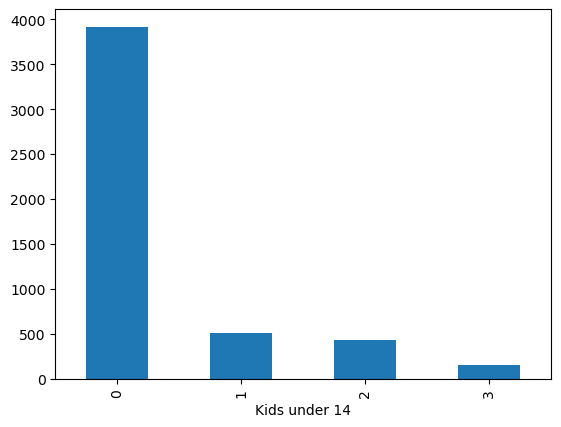

In [23]:
Ontkidsdist.plot.bar();

In [24]:
Ontkidsdist_prop = Ontkidsdist / Ontkidsdist.sum()
Ontkidsdist_prop

Kids under 14
0    0.781568
1    0.101337
2    0.085777
3    0.031319
Name: count, dtype: float64

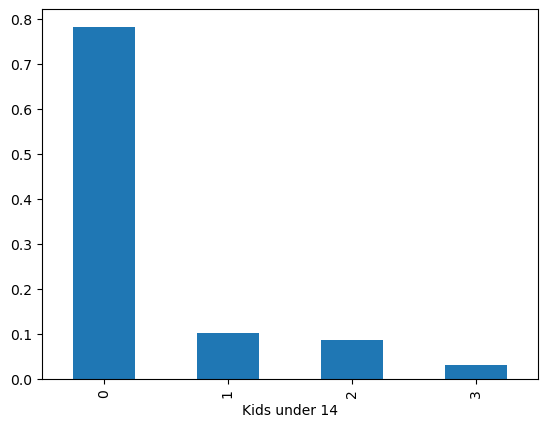

In [25]:
Ontkidsdist_prop.plot.bar();

In [26]:
prov_data_df.groupby(['Prov label'])['Kids under 14'].value_counts()

Prov label            Kids under 14
Alberta               0                1077
                      1                 152
                      2                 145
                      3                  58
British Columbia      0                1672
                      1                 145
                      2                 132
                      3                  36
Manitoba              0                 763
                      1                  93
                      2                  88
                      3                  34
NL                    0                 766
                      1                 103
                      2                  84
                      3                  15
New Brunswick         0                 875
                      2                  79
                      1                  77
                      3                  27
Nova Scotia           0                 858
                      2                 

In [27]:
Sleepduration = prov_data_df['Sleep duration (hours)']

print(type(Sleepduration))

Sleepduration.dtypes

<class 'pandas.core.series.Series'>


dtype('float64')

In [28]:
Sleepduration.describe()

count    17390.000000
mean         8.706552
std          2.217733
min          0.000000
25%          7.500000
50%          8.500000
75%          9.750000
max         24.000000
Name: Sleep duration (hours), dtype: float64

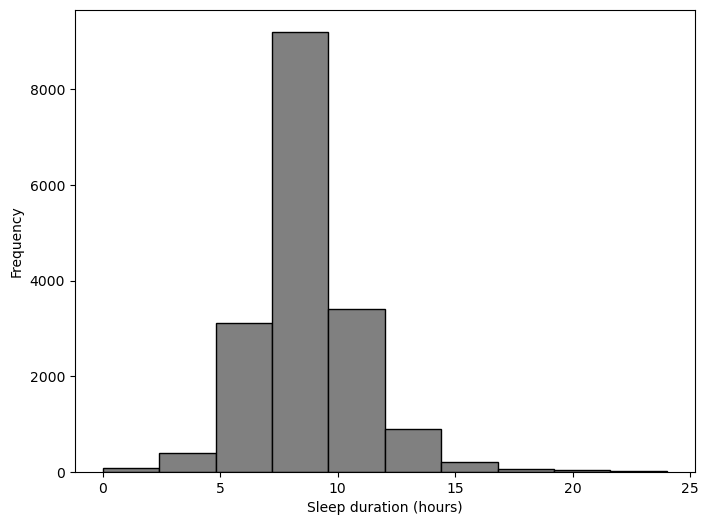

In [29]:
Sleepduration_hist =  Sleepduration.plot.hist(
    bins=10, 
    edgecolor='black', 
    color='grey', 
    figsize = (8, 6)
);

Sleepduration_hist.set_xlabel('Sleep duration (hours)');

In [30]:
pd.cut(Sleepduration, bins=10)

0          (7.2, 9.6]
1          (7.2, 9.6]
2         (9.6, 12.0]
3          (4.8, 7.2]
4          (7.2, 9.6]
             ...     
17385      (4.8, 7.2]
17386    (16.8, 19.2]
17387      (7.2, 9.6]
17388     (9.6, 12.0]
17389      (2.4, 4.8]
Name: Sleep duration (hours), Length: 17390, dtype: category
Categories (10, interval[float64, right]): [(-0.024, 2.4] < (2.4, 4.8] < (4.8, 7.2] < (7.2, 9.6] ... (14.4, 16.8] < (16.8, 19.2] < (19.2, 21.6] < (21.6, 24.0]]

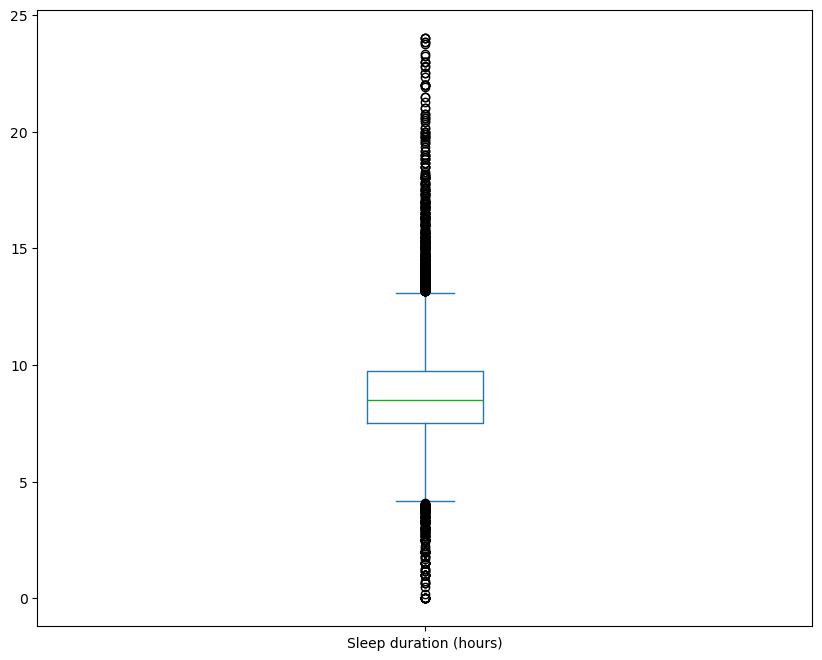

In [31]:
Sleepduration_boxplot = Sleepduration.plot.box(figsize = (10,8));

Sleepduration_boxplot;

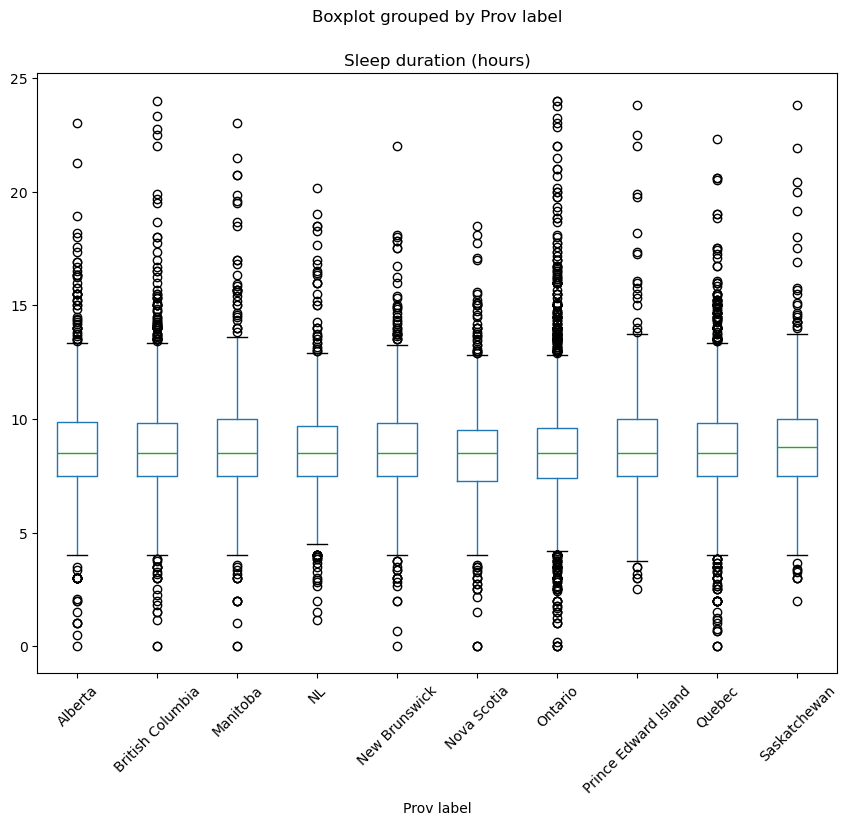

In [32]:
Sleephours_boxplot = prov_data_df.boxplot(
    column='Sleep duration (hours)', 
    by='Prov label', 
    figsize = (10,8),
    rot = 45, 
    grid = False
);

Sleephours_boxplot;

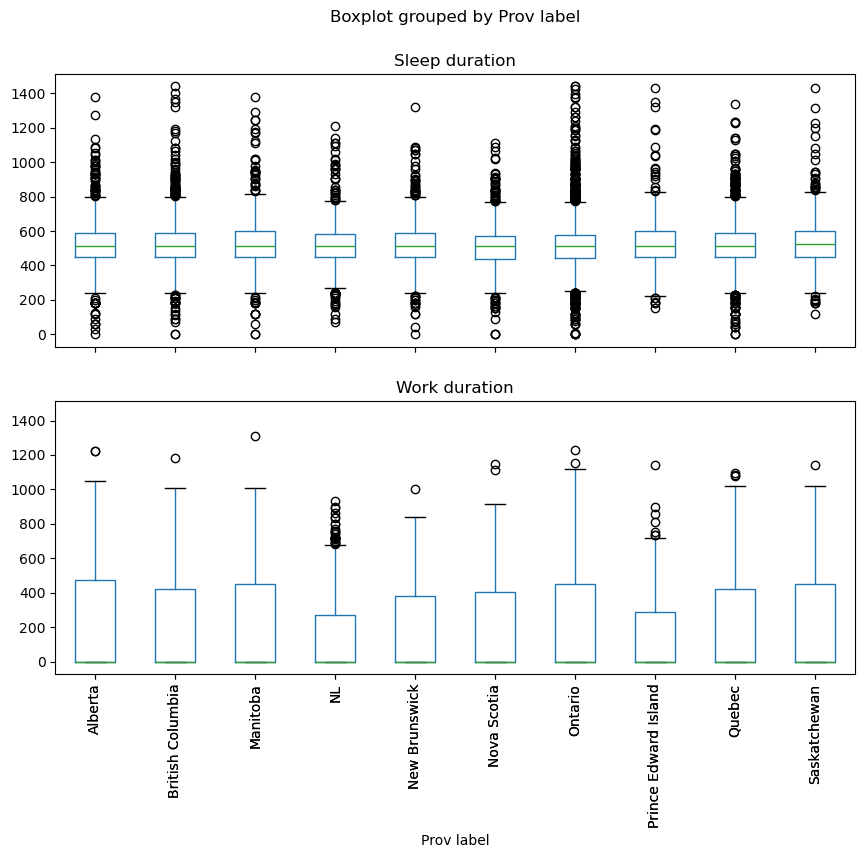

In [33]:
Sleepwork_boxplot = prov_data_df.boxplot(
    column = ['Sleep duration', 'Work duration'], 
    by = 'Prov label', 
    figsize = (10,8), 
    rot = 90, 
    grid = False, 
    layout = (2,1)
);

Sleepwork_boxplot;

In [34]:
prov_data_df['Prov label'].unique()

array(['Manitoba', 'British Columbia', 'Saskatchewan', 'Ontario',
       'Quebec', 'Prince Edward Island', 'Alberta', 'Nova Scotia',
       'New Brunswick', 'NL'], dtype=object)

<class 'matplotlib.axes._axes.Axes'>


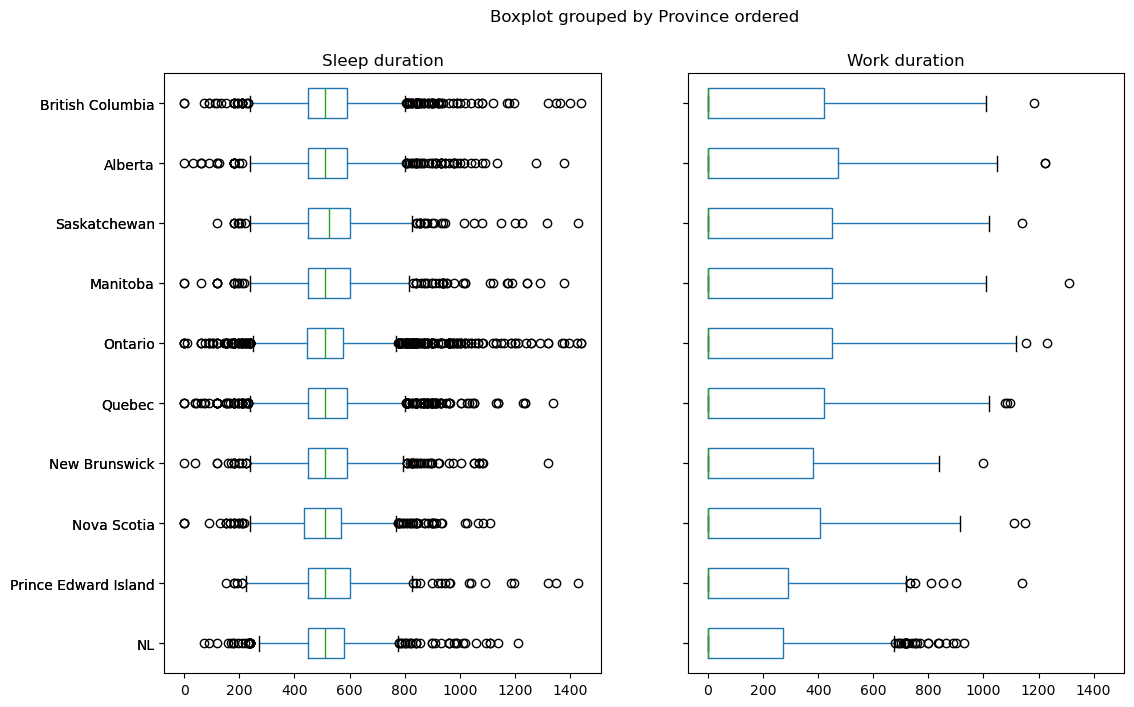

In [35]:
prov_data_df['Province ordered'] = pd.Categorical(
    prov_data_df['Prov label'], categories = [
        'NL', 
        'Prince Edward Island', 
        'Nova Scotia', 
        'New Brunswick',
        'Quebec',
        'Ontario', 
        'Manitoba',
        'Saskatchewan', 
        'Alberta',
        'British Columbia'
    ],
    ordered = True
)
Sleepwork_boxplot = prov_data_df.boxplot(
    column = ['Sleep duration', 'Work duration'], 
    by = 'Province ordered', 
    figsize = (12,8), 
    rot = 0, 
    grid = False, 
    layout = (1,2),
    vert = False
);
print(type(Sleepwork_boxplot[0]));
Sleepwork_boxplot[0].set_ylabel(None);
Sleepwork_boxplot;
